##### Load Basic Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

#### Load the Dataset

In [3]:
df=pd.read_csv('avocado.csv');

In [4]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


#### EDA(Exploritory Data Analysis)

In [5]:
#### drop unnamed columns
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [7]:
#### check the data types information
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [8]:
##### check the statistical summary of data
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


#### Min Avg Price is 44
#### max Avg Price is 325


In [9]:
##### check is null and missing value
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [10]:
#### check for empty value
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [11]:
#### check Shape
df.shape

(18249, 13)

#### 18249 rows and 13 columns

##### visualization and Data Cleaning

            AveragePrice  Total Volume           4046           4225  \
Date                                                                   
2015-01-04      1.301296  7.840216e+05  306465.358704  341213.318796   
2015-01-11      1.370648  7.273686e+05  287260.786944  303781.757778   
2015-01-18      1.391111  7.258221e+05  294469.507963  293167.054907   
2015-01-25      1.397130  7.080211e+05  299121.600648  267862.244167   
2015-02-01      1.247037  1.106048e+06  465675.823704  469409.541481   
...                  ...           ...            ...            ...   
2018-02-25      1.359630  1.011402e+06  334272.681667  267146.528056   
2018-03-04      1.350185  1.035601e+06  348894.357407  292967.505741   
2018-03-11      1.335093  1.032085e+06  342727.715556  278956.907037   
2018-03-18      1.313704  1.052537e+06  332766.612685  285818.850370   
2018-03-25      1.346852  1.095083e+06  340603.336204  308708.172407   

                    4770     Total Bags     Small Bags     Larg

Text(0, 0.5, 'Average Price')

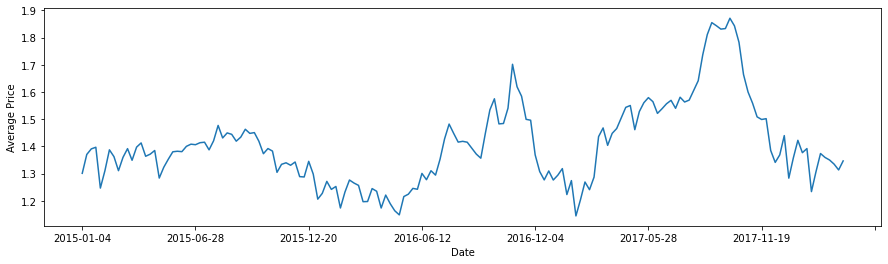

In [12]:
avocado_date=df.groupby('Date').mean()
print(avocado_date)
avocado_date.AveragePrice.plot(figsize=(15,4))
plt.ylabel('Average Price')

#### Date wise Average Price is increasing

<AxesSubplot:>

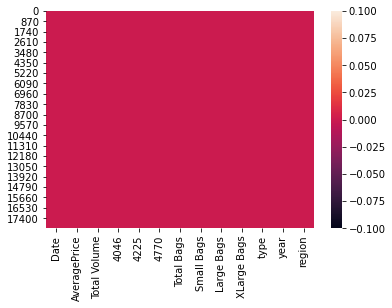

In [13]:
#### check null uning graph 
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

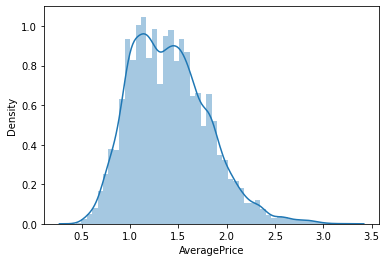

In [14]:
#### check Avg Price with Total value
sns.distplot(df['AveragePrice'])

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

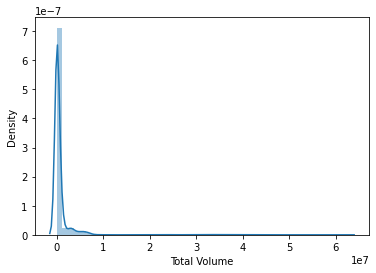

In [15]:
sns.distplot(df['Total Volume'])

<AxesSubplot:xlabel='4046', ylabel='Density'>

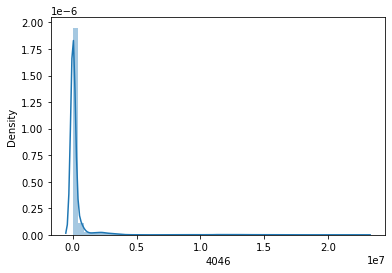

In [16]:
sns.distplot(df['4046'])

#### Right skewed in showing it is because of presence outliers also

<AxesSubplot:xlabel='4225', ylabel='Density'>

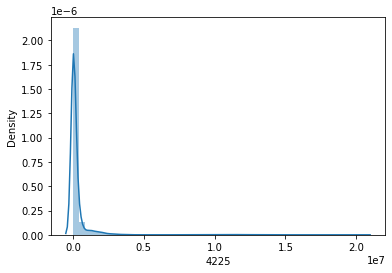

In [17]:
sns.distplot(df['4225'])

#### Right skewed in showing it is because of presence outliers also

<AxesSubplot:xlabel='4770', ylabel='Density'>

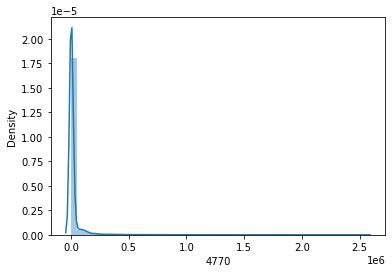

In [18]:
sns.distplot(df['4770'])

#### Right skewed in showing it is because of presence outliers also

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

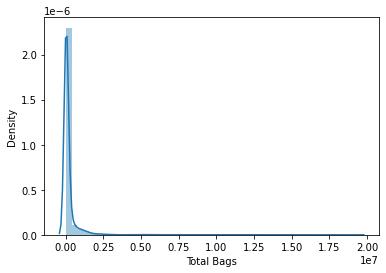

In [19]:
sns.distplot(df['Total Bags'])

#### Right skewed in showing it is because of presence outliers also

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

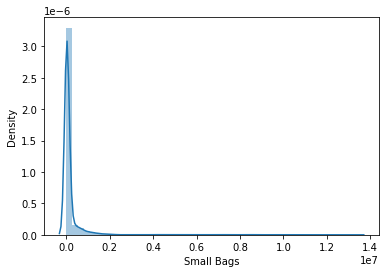

In [20]:
sns.distplot(df['Small Bags'])

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

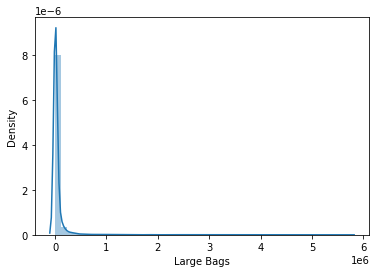

In [21]:
sns.distplot(df['Large Bags'])

#### Right skewed in showing it is because of presence outliers also

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

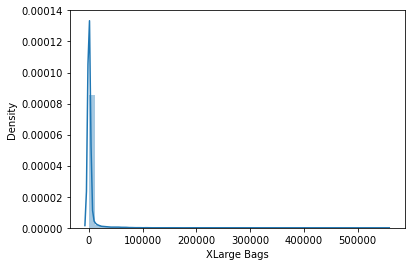

In [22]:
sns.distplot(df['XLarge Bags'])

#### Right skewed in showing it is because of presence outliers also

<AxesSubplot:xlabel='AveragePrice'>

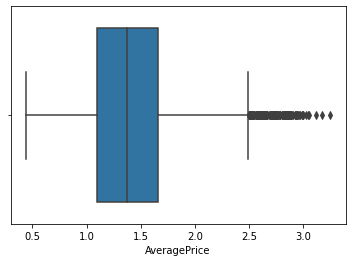

In [23]:
#### check for outliers
sns.boxplot(df['AveragePrice'])

<AxesSubplot:xlabel='XLarge Bags'>

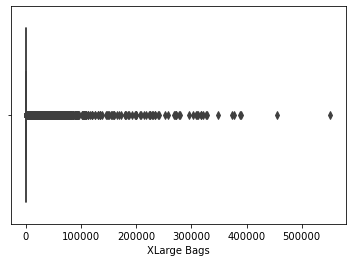

In [24]:
sns.boxplot(df['XLarge Bags'])

<AxesSubplot:xlabel='4046'>

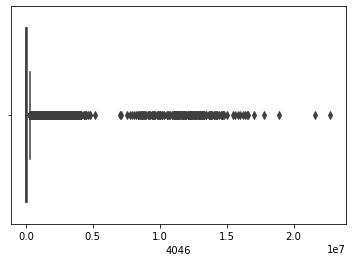

In [25]:
sns.boxplot(df['4046'])

<AxesSubplot:xlabel='XLarge Bags'>

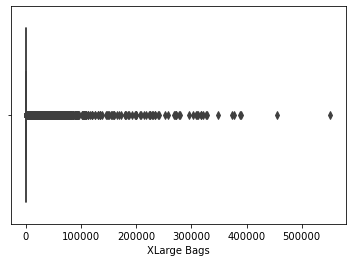

In [26]:
sns.boxplot(df['XLarge Bags'])

<AxesSubplot:xlabel='4770'>

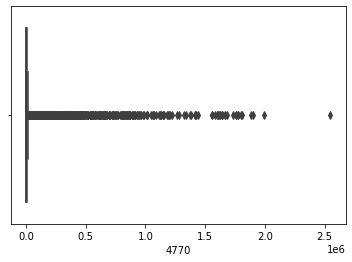

In [27]:
sns.boxplot(df['4770'])

In [28]:
#### split date into day and month
df[["year","month","day",]] = df["Date"].str.split("-", expand = True)

In [29]:
#### drop date columns
df.drop('Date',axis=1,inplace=True)

In [30]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,06
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,02,04
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,01,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,01,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,01,14


In [31]:
#### first of all convert catagorical data into number format
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()


In [32]:
df['type']=LE.fit_transform(df['type'])

In [33]:
df['year']=LE.fit_transform(df['year'])
df['month']=LE.fit_transform(df['month'])
df['day']=LE.fit_transform(df['day'])
#df['region']=LE.fit_transform(df['region'])

In [34]:
df['XLarge Bags'].unique()

array([  0.  ,  33.33, 104.17, ..., 228.27,  12.12,  24.18])

In [35]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int32
region           object
month             int32
day               int32
dtype: object

<AxesSubplot:xlabel='AveragePrice', ylabel='Small Bags'>

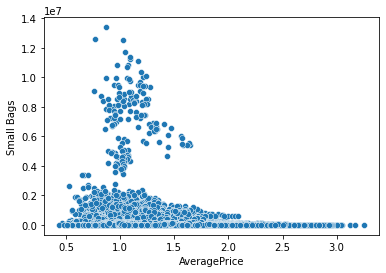

In [36]:
###### scatter plot to show the comparision 
sns.scatterplot(df['AveragePrice'],df['Small Bags'])

<AxesSubplot:xlabel='AveragePrice', ylabel='XLarge Bags'>

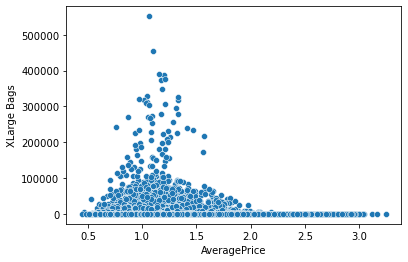

In [37]:
sns.scatterplot(df['AveragePrice'],df['XLarge Bags'])

<AxesSubplot:xlabel='AveragePrice', ylabel='4770'>

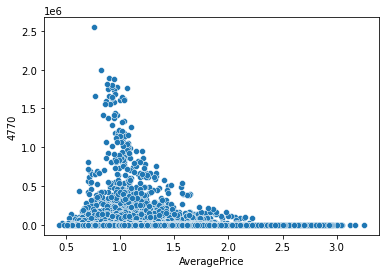

In [38]:
sns.scatterplot(df['AveragePrice'],df['4770'])

In [39]:
#sns.pairplot(df)

In [40]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,Albany,11,26
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,Albany,11,19
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,Albany,11,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,Albany,11,5
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,Albany,10,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,3,WestTexNewMexico,1,3
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,3,WestTexNewMexico,0,27
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,3,WestTexNewMexico,0,20
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,3,WestTexNewMexico,0,13


##### Applied Standard scaler Because it is robust for outliers



In [41]:
scale_data = df.iloc[:,1:9]

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_data = sc.fit_transform(scale_data)

In [43]:
scaled_data=pd.DataFrame(scaled_data,columns=['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags'])

In [44]:
scaled_data

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558
1,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558
2,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558
3,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558
4,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558
...,...,...,...,...,...,...,...,...
18244,-0.241373,-0.230017,-0.243857,-0.212540,-0.229301,-0.226665,-0.220964,-0.17558
18245,-0.242296,-0.230693,-0.242277,-0.212540,-0.233594,-0.232196,-0.221403,-0.17558
18246,-0.242331,-0.230693,-0.243090,-0.205766,-0.233463,-0.231644,-0.222561,-0.17558
18247,-0.241625,-0.230428,-0.242651,-0.205774,-0.231866,-0.229543,-0.222529,-0.17558


In [45]:
df['Total Volume']=scaled_data['Total Volume']
df['4046']=scaled_data['4046']
df['4225']=scaled_data['4225']
df['4770']=scaled_data['4770']
df['Total Bags']=scaled_data['Total Bags']
df['Small Bags']=scaled_data['Small Bags']
df['Large Bags']=scaled_data['Large Bags']
df['XLarge Bags']=scaled_data['XLarge Bags']

In [46]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558,0,0,Albany,11,26
1,1.35,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,0,0,Albany,11,19
2,0.93,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558,0,0,Albany,11,12
3,1.08,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558,0,0,Albany,11,5
4,1.28,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558,0,0,Albany,10,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.241373,-0.230017,-0.243857,-0.212540,-0.229301,-0.226665,-0.220964,-0.17558,1,3,WestTexNewMexico,1,3
18245,1.71,-0.242296,-0.230693,-0.242277,-0.212540,-0.233594,-0.232196,-0.221403,-0.17558,1,3,WestTexNewMexico,0,27
18246,1.87,-0.242331,-0.230693,-0.243090,-0.205766,-0.233463,-0.231644,-0.222561,-0.17558,1,3,WestTexNewMexico,0,20
18247,1.93,-0.241625,-0.230428,-0.242651,-0.205774,-0.231866,-0.229543,-0.222529,-0.17558,1,3,WestTexNewMexico,0,13


In [47]:
one_hot = pd.get_dummies(df['region'])

In [48]:
df=df.join(one_hot)

In [49]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,1.33,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558,0,...,0,0,0,0,0,0,0,0,0,0
1,1.35,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,0,...,0,0,0,0,0,0,0,0,0,0
2,0.93,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558,0,...,0,0,0,0,0,0,0,0,0,0
3,1.08,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558,0,...,0,0,0,0,0,0,0,0,0,0
4,1.28,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.241373,-0.230017,-0.243857,-0.212540,-0.229301,-0.226665,-0.220964,-0.17558,1,...,0,0,0,0,0,0,0,0,0,1
18245,1.71,-0.242296,-0.230693,-0.242277,-0.212540,-0.233594,-0.232196,-0.221403,-0.17558,1,...,0,0,0,0,0,0,0,0,0,1
18246,1.87,-0.242331,-0.230693,-0.243090,-0.205766,-0.233463,-0.231644,-0.222561,-0.17558,1,...,0,0,0,0,0,0,0,0,0,1
18247,1.93,-0.241625,-0.230428,-0.242651,-0.205774,-0.231866,-0.229543,-0.222529,-0.17558,1,...,0,0,0,0,0,0,0,0,0,1


In [50]:
df.drop('region',axis=1,inplace=True)

In [51]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,1.33,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558,0,...,0,0,0,0,0,0,0,0,0,0
1,1.35,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,0,...,0,0,0,0,0,0,0,0,0,0
2,0.93,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558,0,...,0,0,0,0,0,0,0,0,0,0
3,1.08,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558,0,...,0,0,0,0,0,0,0,0,0,0
4,1.28,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.241373,-0.230017,-0.243857,-0.212540,-0.229301,-0.226665,-0.220964,-0.17558,1,...,0,0,0,0,0,0,0,0,0,1
18245,1.71,-0.242296,-0.230693,-0.242277,-0.212540,-0.233594,-0.232196,-0.221403,-0.17558,1,...,0,0,0,0,0,0,0,0,0,1
18246,1.87,-0.242331,-0.230693,-0.243090,-0.205766,-0.233463,-0.231644,-0.222561,-0.17558,1,...,0,0,0,0,0,0,0,0,0,1
18247,1.93,-0.241625,-0.230428,-0.242651,-0.205774,-0.231866,-0.229543,-0.222529,-0.17558,1,...,0,0,0,0,0,0,0,0,0,1


In [52]:
x=df.drop('AveragePrice',axis=1)
y=df['AveragePrice']

In [53]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.241373,-0.230017,-0.243857,-0.212540,-0.229301,-0.226665,-0.220964,-0.17558,1,3,...,0,0,0,0,0,0,0,0,0,1
18245,-0.242296,-0.230693,-0.242277,-0.212540,-0.233594,-0.232196,-0.221403,-0.17558,1,3,...,0,0,0,0,0,0,0,0,0,1
18246,-0.242331,-0.230693,-0.243090,-0.205766,-0.233463,-0.231644,-0.222561,-0.17558,1,3,...,0,0,0,0,0,0,0,0,0,1
18247,-0.241625,-0.230428,-0.242651,-0.205774,-0.231866,-0.229543,-0.222529,-0.17558,1,3,...,0,0,0,0,0,0,0,0,0,1


In [54]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

###### Train Model

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model,x,y):
    #train the model
    model.fit(x,y)
    
    #predict the training set
    pred=model.predict(x)
    
    #perform Cross validation
    cv_score=cross_val_score(model,x,y,scoring='r2',cv=5)
   
    print('Model Report')
    print('MSE :',mean_squared_error(y,pred))
    print("cv score :",cv_score)


Model Report
MSE : 0.06626372755535592
cv score : [ 4.15047276e-02  3.22761883e-01  5.20343413e-01  2.63348928e-01
 -4.27289321e+01]


<AxesSubplot:title={'center':'Model Coficient'}>

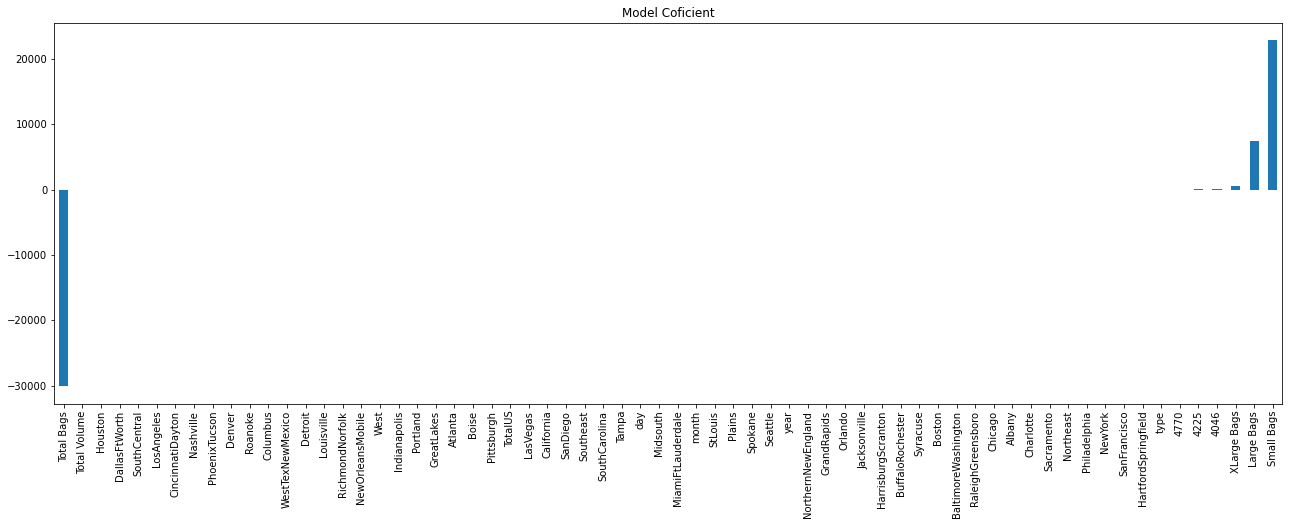

In [56]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
model=LinearRegression()
train(model,x,y)
coef =pd.Series(model.coef_,x.columns).sort_values()
plt.figure(figsize=(22,7))
coef.plot(kind='bar',title='Model Coficient')

In [57]:
##### small Bags and Large Bags shows the postive valve (shown in right side)
#### Total Bags in negative value shown in left side

Model Report
MSE : 0.06626945098311139
cv score : [0.04329244 0.32402953 0.52032728 0.26359264 0.1888257 ]


<AxesSubplot:title={'center':'Model Coficient'}>

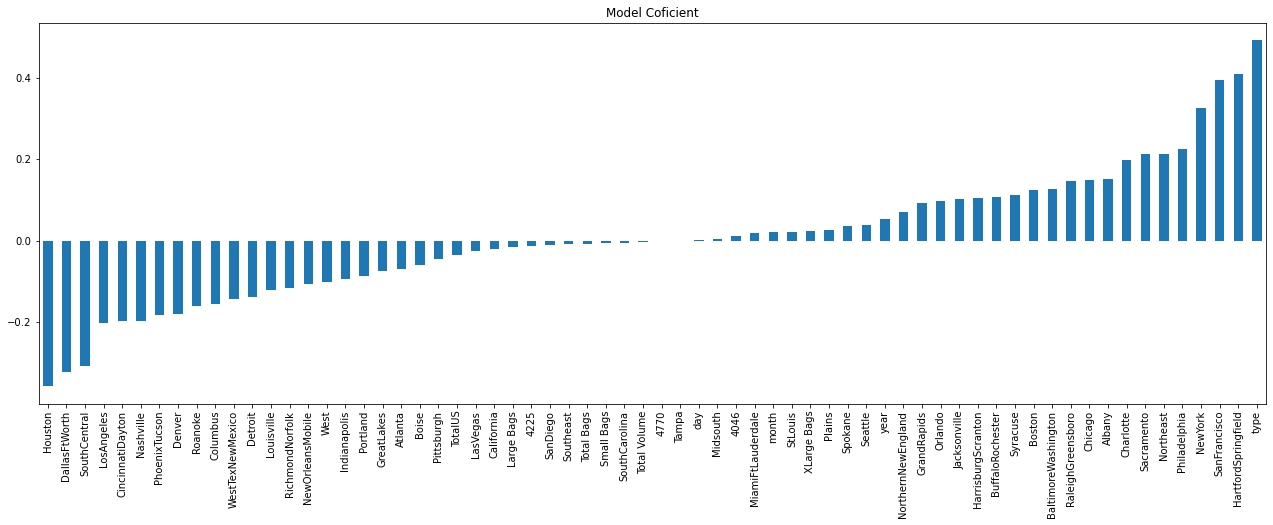

In [58]:
model=Ridge()
train(model,x,y)
coef =pd.Series(model.coef_,x.columns).sort_values()
plt.figure(figsize=(22,7))
coef.plot(kind='bar',title='Model Coficient')

Model Report
MSE : 0.1621395230146009
cv score : [-3.98236185 -0.75045983 -0.01749803 -0.47032699 -0.80592045]


<AxesSubplot:title={'center':'Model Coficient'}>

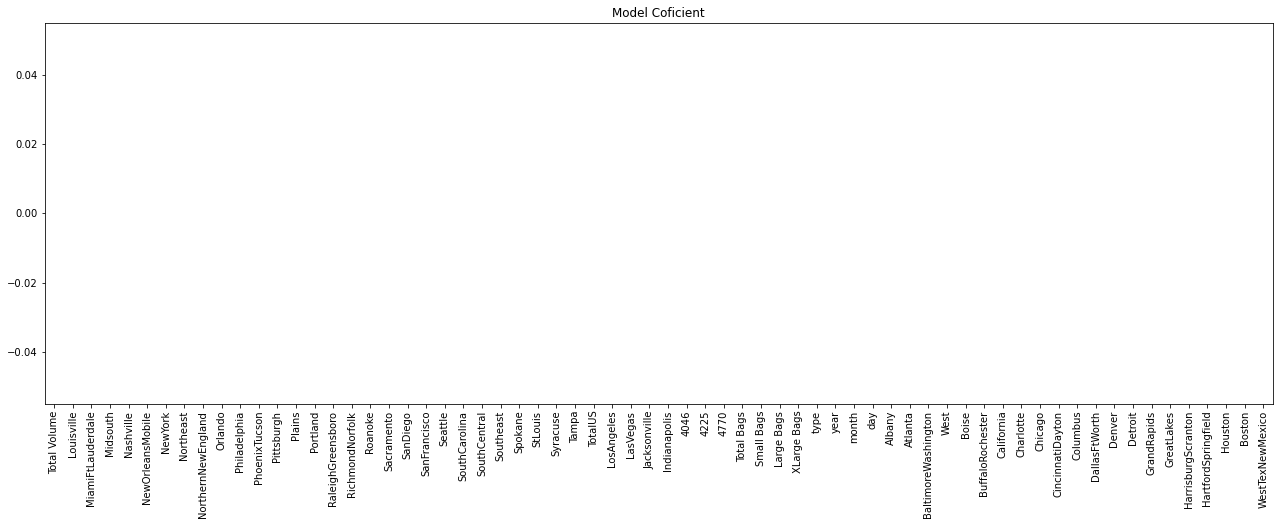

In [59]:
model=Lasso()
train(model,x,y)
coef =pd.Series(model.coef_,x.columns).sort_values()
plt.figure(figsize=(22,7))
coef.plot(kind='bar',title='Model Coficient')

In [60]:
#####No feature 

In [61]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [63]:
RF.fit(x_train,y_train)


RandomForestRegressor()

In [64]:
pred_test=RF.predict(x_test)

In [65]:
pred_train=RF.predict(x_train)

In [66]:
pred_test
print(r2_score(y_test,pred_test))
rfs=r2_score(y_test,pred_test)
print('R2_score:',rfs*100)
rfscore=cross_val_score(RF,x_train,y_train,cv=5,scoring='r2')
rfc=rfscore.mean()
print('cross_val_score',rfc*100)

0.890335525573382
R2_score: 89.0335525573382
cross_val_score 88.90373375000226


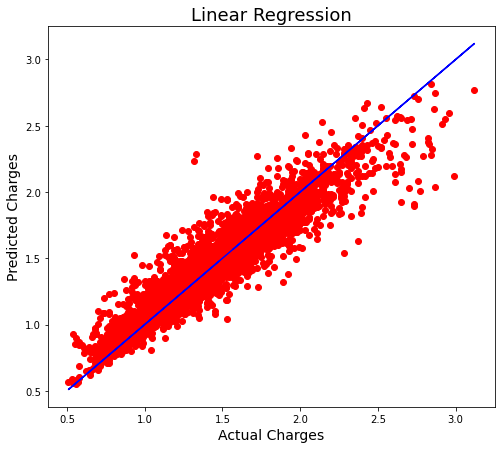

In [67]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Charges',fontsize=14)
plt.ylabel('Predicted Charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

<AxesSubplot:title={'center':'Feature Importance'}>

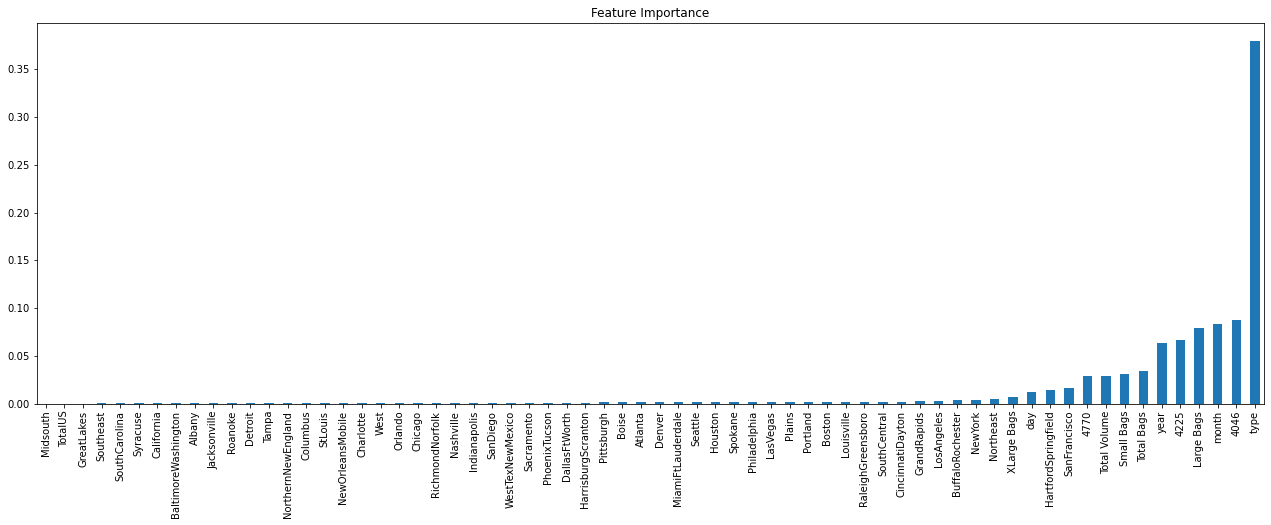

In [68]:
coef =pd.Series(RF.feature_importances_,x.columns).sort_values()
plt.figure(figsize=(22,7))
coef.plot(kind='bar',title='Feature Importance')

In [69]:
##### it shows the feature importance bar showing positivness in data

In [70]:
from sklearn.ensemble import ExtraTreesRegressor
ET=ExtraTreesRegressor(n_estimators = 100)

In [71]:
ET.fit(x_train,y_train)


ExtraTreesRegressor()

In [72]:
pred_test=ET.predict(x_test)
pred_train=ET.predict(x_train)
pred_test
print(r2_score(y_test,pred_test))
rfs=r2_score(y_test,pred_test)
print('R2_score:',rfs*100)
rfscore=cross_val_score(ET,x_train,y_train,cv=5,scoring='r2')
rfc=rfscore.mean()
print('cross_val_score',rfc*100)

0.9297577893594722
R2_score: 92.97577893594722
cross_val_score 92.3806936183942


In [73]:
##### ExtraTress Regressor have max score than random forest

<AxesSubplot:title={'center':'Feature Importance'}>

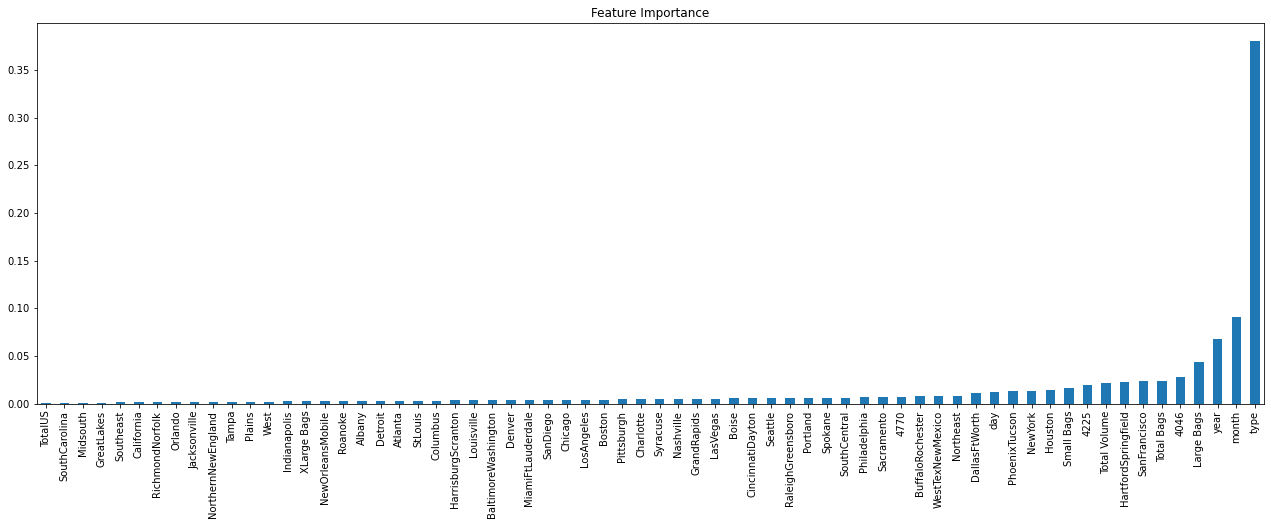

In [74]:
coef =pd.Series(ET.feature_importances_,x.columns).sort_values()
plt.figure(figsize=(22,7))
coef.plot(kind='bar',title='Feature Importance')

# Reguralization

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

In [76]:
parameters ={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [77]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)

In [78]:
lss

-0.001495591556041509

In [79]:
cv_score=cross_val_score(RF,x_train,y_train,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8891650843800212

In [80]:
#### get Wrost best fit line with lasso and cv is also not good because of outliers effect more

#### from Tree techniques ExtraTreesRegressor is best model having 0.9301917674366778
# R2_score: 93.01917674366777
# cross_val_score 92.42521130436273